<a href="https://colab.research.google.com/github/naga-dheeraj-p/Machine_LEARNING_projects/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2:**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/sample_data/train - train.csv')
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


**PRINCIPAL COMPONENT ANALYSIS**:
PCA is used for dimensionality reduction

In [49]:
from sklearn.decomposition import PCA

x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

pca=PCA(0.9)
x_pca=pca.fit_transform(x)
pca.explained_variance_ratio_


array([0.35979627, 0.21509562, 0.07085501, 0.05170324, 0.03748339,
       0.03079644, 0.02942773, 0.0274222 , 0.02467694, 0.02224298,
       0.02063737, 0.01985345])

**LABEL ENCODING AND CORRELATION MATRIX:**

*I have performed label encoding in order to generate the correlation matrix.*

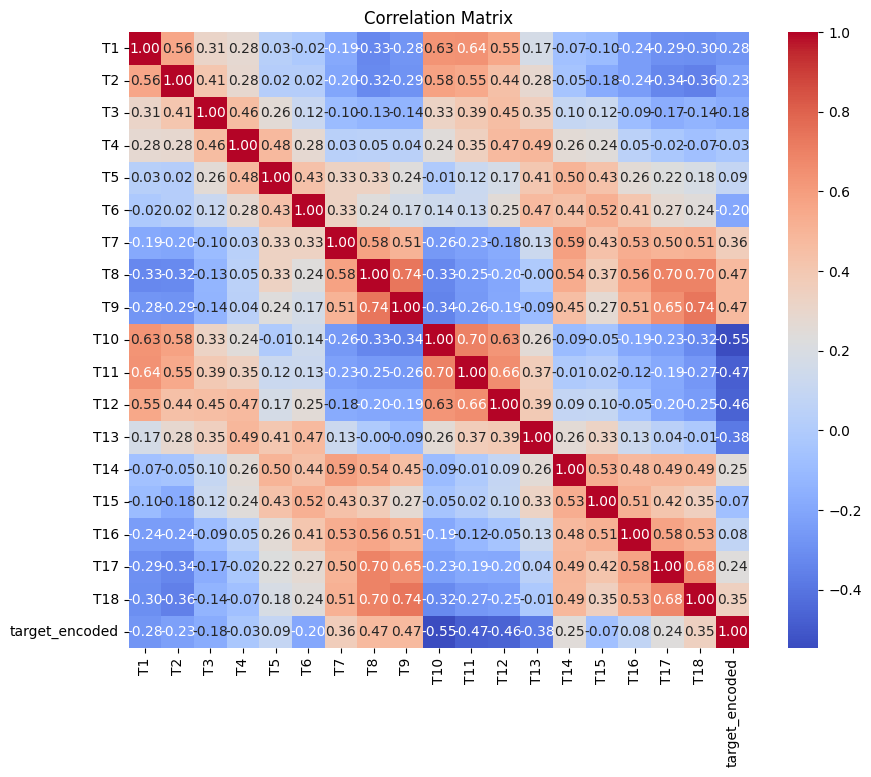

In [14]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/sample_data/train - train.csv')

target_column = data['target']
label_encoder = LabelEncoder()
data['target_encoded'] = label_encoder.fit_transform(target_column)
data.drop(columns=['target'], inplace=True)

encoded_data = pd.DataFrame(data)
correlation_matrix = encoded_data.corr()
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

____________________________________________________________________________________________________________________________________________________________

**RANDOM FOREST CLASSIFIER**

**Reason:**
*I have opted for Random Forest because it combines several decision trees, which helps enhance the accuracy and reliability of the model. By aggregating the predictions from multiple trees, Random Forest provides a more robust and dependable outcome.*

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=50)

r_f_classifier = RandomForestClassifier(n_estimators=100, random_state=50)
r_f_classifier.fit(x_train_scaled, y_train)

y_pred = r_f_classifier.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",round(accuracy*100,2),"%")

x_test_new=pd.read_csv('/content/sample_data/test - test.csv')
x_new=x_test_new.iloc[:, :].values

scaler = StandardScaler()
x_scaled_new = scaler.fit_transform(x_new)
y_pred_new = r_f_classifier.predict(x_scaled_new)

print("Predicted Target values for test data:",y_pred_new)


Accuracy:  98.78 %
Predicted Target values for test data: ['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']


*In the below code,i have used Random Forest Classifier.The target variable was encoded such that 'A' and 'B' were mapped to 1 and 2, respectively. Subsequently, a correlation matrix was constructed, focusing only on features with correlation coefficients greater than 0.2*

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

data = pd.read_csv('/content/sample_data/train - train.csv')


x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with all the features):", round(accuracy * 100, 2), '%')
print("Predicted values are:",y_pred)
print(' ')

mapping_dict = {'A': 1, 'B': 2}
data['target'] = data['target'].str[0].map(mapping_dict)
corr_matrix = data.corr()
selected_features = corr_matrix.index[abs(corr_matrix['target']) > 0.2].tolist()
selected_features.remove('target')


x_filtered = data[selected_features].values
x_train_filtered, x_test_filtered, y_train_new, y_test_new = train_test_split(x_filtered, y, test_size=0.2, random_state=50)


rf_classifier_filtered = RandomForestClassifier(n_estimators=100, random_state=100)
rf_classifier_filtered.fit(x_train_filtered, y_train)
y_pred_filtered = rf_classifier_filtered.predict(x_test_filtered)

accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
print("Accuracy with only filtered features:", round(accuracy_filtered * 100, 2), '%')
print('Predicted values are:',y_pred_filtered)


Accuracy with all the features): 98.76 %
Predicted values are: ['B47' 'A35' 'B58' ... 'B20' 'A50' 'A49']
 
Accuracy with only filtered features: 98.29 %
Predicted values are: ['B47' 'A35' 'B58' ... 'B20' 'A50' 'A49']


**K NEAREST NEIGHBORS**

*I have also developed using KNN because it makes predictions based on the majority class of the k nearest neighbors in the feature space.*

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values


pca = PCA(0.9)
x_pca = pca.fit_transform(x)
pca.explained_variance_ratio_


x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=50)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train_pca, y_train)

y_pred = knn_classifier.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2), "%")


x_test_new = pd.read_csv('/content/sample_data/test - test.csv')
x_new = x_test_new.iloc[:, :-1].values
pca=PCA(0.9)
x_pca_new = pca.fit_transform(x_new)
pca.explained_variance_ratio_


y_pred_new = knn_classifier.predict(x_pca_new)
print("Predicted Target values for test data:", y_pred_new)


Accuracy: 97.93 %
Predicted Target values for test data: ['B74' 'A6' 'B73' ... 'B69' 'A42' 'A80']


**LOGISTIC REGRESSION**


I chose Logistic Regression for this model because it is capable of handling large datasets efficiently. Additionally, Logistic Regression supports regularization techniques such as L1 and L2 regularization, which are effective in preventing overfitting and improving the generalization ability of the model.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=50)

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2), "%")

x_test_new = pd.read_csv('/content/sample_data/test - test.csv')

x_new = x_test_new.iloc[:, :].values
x_new_scaled = scaler.fit_transform(x_new)
y_pred_new = logistic_model.predict(x_new_scaled)
print("Predicted Target values for test data:", y_pred_new)


Accuracy: 97.25 %
Predicted Target values for test data: ['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']


SVM USING NON-LINEAR(RBF-RADIAL BASIC FUNCTION)

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

data=pd.read_csv('/content/sample_data/train - train.csv')

x = data.iloc[:, 0:18].values
y = data.iloc[:,18].values

classifier=svm.SVC(kernel='rbf',gamma='scale',C=2,random_state=50)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
print(round(accuracy*100,2),'%')

a=pd.read_csv('/content/sample_data/test - test.csv')
b = classifier.predict(a)
print("Predicted Target Values for Test Data:",b)


98.57 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predicted Target Values for Test Data:
['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']


________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **TASK 3**

In [74]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/sample_data/rawdata - inputsheet.csv')
data.head()

,date,time,sensor,location,number,activity,position,location.1
0,1/16/2024,10:10:30 AM,0.0,A1,1,placed,inside,A1
1,1/16/2024,10:12:30 AM,1.0,A2,1,picked,inside,A2
2,1/16/2024,10:28:30 AM,1.0,A3,1,picked,Inside,A3
3,1/16/2024,10:38:20 AM,0.0,A4,1,placed,Inside,A4
4,1/16/2024,10:45:20 AM,1.0,A5,1,placed,inside,A5


***QUESTION 1:***

In [5]:
import pandas as pd
data = pd.read_csv("/content/sample_data/rawdata - inputsheet.csv")
data['time'] = pd.to_datetime(data['time'])
data['location'] = data['location'].apply(lambda x: 'inside' if x == 'A1' else 'outside')
grouped_data = data.groupby(['date', 'location'])['time'].agg(duration=(lambda x: max(x) - min(x)))
grouped_data

duration
date      location                
1/16/2024 inside   0 days 09:53:10
          outside  0 days 11:57:00
1/17/2024 inside   0 days 00:00:00
          outside  0 days 03:10:50
1/18/2024 inside   0 days 03:52:50
          outside  0 days 08:52:00

***Question 2:***

In [6]:
grouped_data = data.groupby(['date','activity'])['activity'].count().unstack(fill_value=0)
grouped_data


activity,picked,placed
date,,
1/16/2024,40,40
1/17/2024,10,9
1/18/2024,37,39


___

# **STREAMLIT**

***SAVE THE TRAINING MODEL***

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=50)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=50)
rf_classifier.fit(x_train_scaled, y_train)

y_pred = rf_classifier.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",round(accuracy*100,2),"%")

import numpy as np
input_data = np.array([-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63]) #just checking the output
input_data_reshaped=input_data.reshape(1,-1)
input_data_scaled = scaler.transform(input_data_reshaped)
predictions = rf_classifier.predict(input_data_scaled)
print("Predicted class for input data:", predictions)


Accuracy:  98.78 %
Predicted class for input data: ['B61']


'\nx_test_new=pd.read_csv(\'/content/sample_data/test - test.csv\')\nx_new=x_test_new.iloc[:, :].values\n\nscaler = StandardScaler()\nx_scaled_new = scaler.fit_transform(x_new)\ny_pred_new = rf_classifier.predict(x_scaled_new)\n\nprint("Predicted Target values for test data:",y_pred_new)\n'

In [48]:
import pickle
file_name='trained_mode.sav'
pickle.dump(r_f_classifier,open(file_name,'wb'))

In [50]:
#Loading the model
loaded_model=pickle.load(open('trained_mode.sav','rb'))

In [52]:
import numpy as np
input_data = np.array([-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63])
input_data_reshaped=input_data.reshape(1,-1)
input_data_scaled = scaler.transform(input_data_reshaped)
predictions = r_f_classifier.predict(input_data_scaled)
print("Predicted class for input data:", predictions)

Predicted class for input data: ['B61']
